# Chosen distances for gevsimbad

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE


In [2]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [3]:
#metric_function = st.wasserstein_distance

In [4]:
metric_function = lambda x, y : np.sqrt(np.sum(np.multiply(x, y)))/np.sqrt(np.sum(np.multiply(x, x))*np.sum(np.multiply(y, y)))

In [5]:
#name columns included in the final display
other_names = ['s_MAIN_ID', 's_class', 'gev_1FGL_Name', 'gev_CLASS1', 'marked']
#from gamma bins directory
path_to_catalog = "markeddata/gevsimbad_normalized.txt"

In [6]:
spectra = pd.read_csv(path_to_gamma_bins +path_to_catalog)
spectra.head()

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,...,s_FLUX_u,s_FLUX_g,s_FLUX_r,s_FLUX_i,s_FLUX_z,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
0,0.016565,0.318116,0.116714,0.194982,0.353622,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,b'[KRL2007b] 194',Be,b'1FGL J1636.4-4737c',b'snr ',0
1,0.000004,0.000080,0.000017,0.000040,0.000080,0.0,0.000087,0.000036,0.000081,0.000102,...,0.0,0.000044,0.000123,0.000141,0.0,b'HD 328990',Be,b'1FGL J1651.5-4602c',b' ',0
2,0.014351,0.087269,0.096480,0.058873,0.082640,0.0,0.000042,0.000023,0.000179,0.000817,...,0.0,0.000000,0.000000,0.000000,0.0,b'UCAC2 5051621',Be,b' ',b'spp ',0
3,0.054146,0.123705,0.442960,0.121311,0.188794,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,b'SSTGC 519103',Be,b'1FGL J1745.6-2900c',b'spp ',0
4,0.046428,0.232212,0.271011,0.145261,0.304359,0.0,0.000000,0.000028,0.000026,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,b'LIN 341',Be,b'1FGL J0101.3-7257 ',b'GAL ',0


In [7]:
spectrum_columns = spectra.columns[:-len(other_names)]

Computation of pairwise distances (metric - Earth mover's distance (Wasserstein distance))

In [8]:
if type(metric_function) == str:
    dist = DistanceMetric.get_metric(metric_function)
else:
    dist = DistanceMetric.get_metric("pyfunc", func=metric_function)
spectra_distances = dist.pairwise(spectra[spectrum_columns])
#pd.DataFrame(spectra_distances).to_csv(path_to_gamma_bins +"markeddata/gevtev_spectra_EM_distances.txt", index=False)

Vizualization (mapping to 2D-plane)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


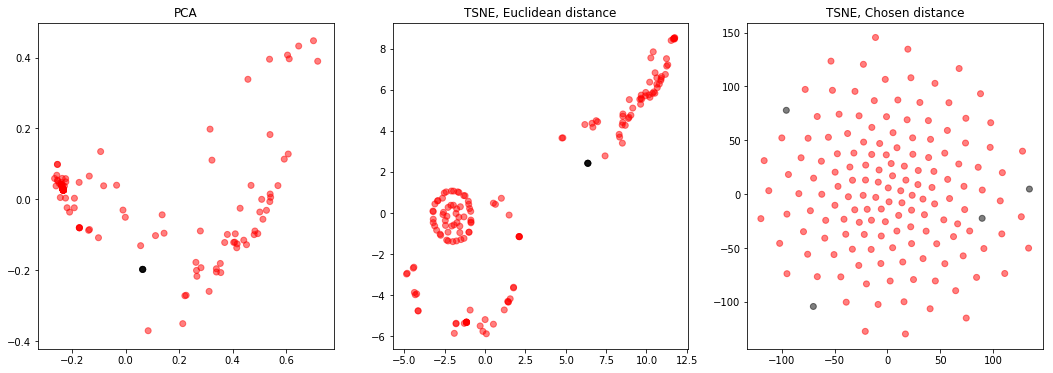

In [9]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, metric=metric_function, random_state=42)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

KMeans clustering (with Earth mover's distance metric)

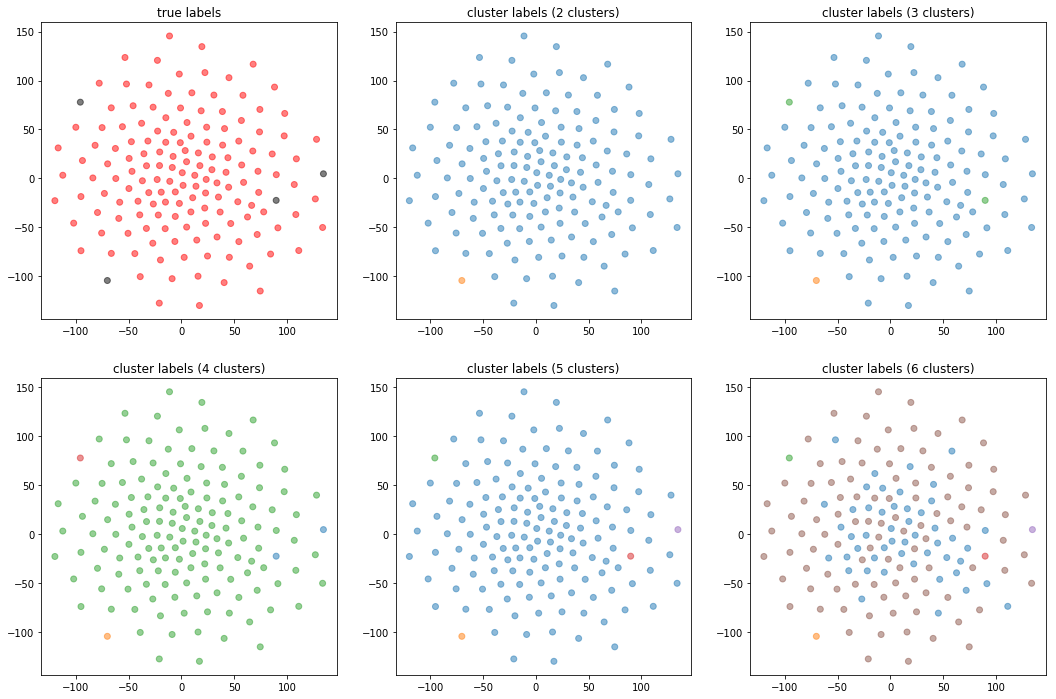

In [10]:
# visualization - tsne with Earth mover's distance
tsne = TSNE(n_components=2, metric=metric_function, random_state=42)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

plt.subplots(figsize=(18, 12))
plt.subplot(2, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 7):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(2, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [11]:
n = 4

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])

0 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
91,b'LS I +61 303',B0Ve,b'1FGL J0240.5+6113 ',b'HMB ',1
146,b'V* V479 Sct',B0Ve,b'1FGL J1826.2-1450 ',b'HMB ',1


1 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
122,b'2FGL J1019.0-5856',B0Ve,b'1FGL J1018.6-5856 ',b'HMB ',1


2 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
0,b'[KRL2007b] 194',Be,b'1FGL J1636.4-4737c',b'snr ',0
1,b'HD 328990',Be,b'1FGL J1651.5-4602c',b' ',0
2,b'UCAC2 5051621',Be,b' ',b'spp ',0
3,b'SSTGC 519103',Be,b'1FGL J1745.6-2900c',b'spp ',0
4,b'LIN 341',Be,b'1FGL J0101.3-7257 ',b'GAL ',0
5,b'LS VI -04 15',B,b' ',b' ',0
6,b'LS I +56 58',B,b' ',b' ',0
7,b'PG 1101+529',B,b' ',b' ',0
8,b'GALEX J175340.5-500741',B,b'1FGL J1754.0-5002 ',b'bcu ',0
9,b'HD 306182',B,b' ',b'spp ',0


3 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
66,b'[MT91] 213',B0Ve,b'1FGL J2032.2+4127 ',b'PSR ',1
